# Task 1-I : Linear Models

* We will learn linear regression

In [36]:
###################
## Run this cell ##
###################
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
X_data = df.drop(['MEDV'], axis=1)
print("1 row is not about one house but one town ")
print(boston.DESCR)

1 row is not about one house but one town 
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property

# Q1. Split the df into training set & test set

1. x : all columns in df except 'MEDV'
2. y : the column 'MEDV' in df (df['MEDV'])
3. variable names :
    * x_train, y_train
    * x_test, y_test
4. train : test = 8 : 2
5. randomstate : 2021

Question : Why we need to prepare test set? 

**Your Answer :**

저희는 80%를 차지하는 train데이터로 모델을 훈련할 것입니다(지도학습). 이 모델(Linear Regression)을 통해 20%의 test데이터를 예측하고 정확도, score 점수를 통해 overfitting or underfitting을 분석하여 파라미터를 수정하거나 최적의 모델을 만들기 위해 test set가 필요하다고 생각합니다.

In [37]:
#################################################
## This cell will not be provided, after Task1 ##
#################################################

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['MEDV'], axis=1), df['MEDV'],
                                                    test_size=0.2, random_state=2021)

# Q2. Train linear regression model

1. declare your model as lr

In [38]:
####################
## Your code here ##
####################
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

모델은 LinearRegression모델이며 lr 객제를 이용하여 선언하였고 훈련하였습니다.

# Q3. Make a prediction
1. y_pred_train : prediction on training set
2. y_pred_test : prediction on test set

In [39]:
####################
## Your code here ##
####################
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Q4. Evaluate the model on the training set & test set

* Use RMSE

Question : If rmse is 4, can we say the error of our model is $4? 

**Your Answer :** 평가지표에는 수많은 평가지표가 있을수 있지만 저희는 RSME를 저의 모델의 평가지표로 기준을 정했기 때문에 RMSE =4인경우 the error of our model is 4라고 생각합니다. 즉 이는 $4000 만큼 에러가 있다고 볼 수 있습니다.

In [40]:
####################
## Your code here ##
####################
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('RMSE train : {:f}'.format(rmse_train))

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('RMSE test : {:f}'.format(rmse_test))

RMSE train : 4.674668
RMSE test : 4.827000


사이킷런은 RMSE를 제공해주지 않기 때문에 직접 계산하는 식을 작성하였습니다.

# Q5. Complete the equation of the linear regression model

\begin{align}
MEDV = \beta_0 &\ + \beta_1*CRIM + \beta_2*ZN + \beta_3*INDUS + \beta_4*CHAS \\
&+ \beta_5*NOX + \beta_6*RM + \beta_7*AGE + \beta_8*DIS + \beta_9*RAD \\
& + \beta_{10}*TAX + \beta_{11}*PTRATIO + \beta_{12}*B + \beta_{13}*LSTAT
\end{align}

* print $ \beta_0 $ ~ $ \beta_{13} $ with feature(column) name
* example
```
beta_0 for intercept : 21
beta_1 for CRIM : - 12
~~~
beta_13 for LSTAT : -5 
```

In [41]:
print('beta_0 for intercept : ',lr.intercept_)

element = X_data.columns
for i,(j,k) in enumerate(zip (element, lr.coef_)):
  print('beta_{} for {} : {}'.format(i+1,j,k))

beta_0 for intercept :  35.074446443842035
beta_1 for CRIM : -0.11455671812732975
beta_2 for ZN : 0.05323427588138077
beta_3 for INDUS : 0.003283317180316192
beta_4 for CHAS : 3.508465036705998
beta_5 for NOX : -18.13566684114273
beta_6 for RM : 3.8252394730909423
beta_7 for AGE : 0.011058249800921273
beta_8 for DIS : -1.529967394769819
beta_9 for RAD : 0.33922130811188655
beta_10 for TAX : -0.011867833580858023
beta_11 for PTRATIO : -0.8842149500225382
beta_12 for B : 0.009528304243272022
beta_13 for LSTAT : -0.57816905178081


lr.intercept_를 통해 절편값을 알수 있으며 lr.coef_를 통해 독립변수의 회귀계수값을 알 수 있습니다. 

TA님께서 원하시는 답안의 출력형식을 확보하기 위하여 element를 선언해주었고 enumerate함수와 zip함수를 사용하였습니다.

# Q6. Analyze the effect of 'RM' (average average number of rooms per dwelling)

**assumption1 : every other features are fixed.**<br>
**assumption2 : use training set to anlayze.**
1. How does the 'MEDV(house price)' change when 'RM' increases by 1 ?
2. What is the change in the 'MEDV' due to the standard deviation(std) of 'RM'
    * hint : beta_6 * std('RM')
    * you can regard std('RM') as a mean variablity of 'RM' ( roughly )
3. What is the change in the 'MEDV' due to the maximum change of 'RM'
    * hint : maximum change of 'RM' = max('RM') - min('RM')

<h2> 문제 6-1번 풀이 </h2>

In [42]:
####################
## Your code here ##
####################
coef = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coef.sort_values(ascending = False)

RM          3.8
CHAS        3.5
RAD         0.3
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.5
NOX       -18.1
dtype: float64

시각적으로 보기 편하기 위해 각각의 회귀계수를 소숫점 첫번째자리만 출력한후 내림차순이 되도록 만들었습니다.  

RM의 회귀계수는 약 3.8입니다. 만일 RM이 1이 증가하면 MEDV는 약 3.8이 증가합니다.

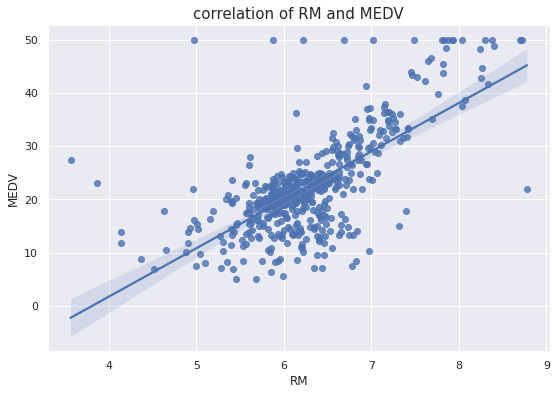

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=df['RM'],y=df['MEDV'],fit_reg=True)
plt.title("correlation of RM and MEDV", fontsize=15)
plt.show()

RM의 회귀계수가 약 3.8 즉 양의 상관관계의 값을 추출하였으므로 시각적으로 양의 상관관계를 확인하기 위해 regplot함수를 사용하였습니다. 
***

<h2>문제 6-2번 풀이 </h2>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


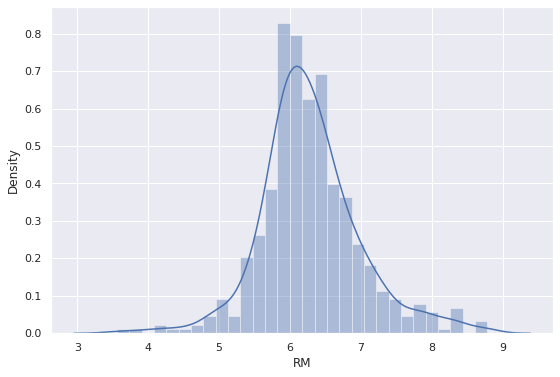

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(9,6)})
sns.distplot(df['RM'], bins=30)
plt.show() 

RM의 분포도를 확인해보고 싶어서 displot함수를 사용하였습니다. 이를 통해 평균으로 부터 데이터가 어느정도 떨어져 있는지 시각적으로 확인이 가능합니다.

In [45]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


RM의 평균과 표준편차 값을 확인할수 있습니다.

표준편차의 값이 커진다는 뜻은 데이터 값들이 평균과 밀접하지 않고 다양한 값을 지닌다는 의미이고 이로 인해 종속변수 값의 변화는 더욱 커 집니다.

In [46]:
std_RM = df.describe().reset_index().at[2,'RM'] #RM의 표준편차
beta_6 = lr.coef_[5]
hint = std_RM * beta_6 #표준편차 * 가중치
hint

2.6876788314626956

TA님께서 힌트를 주셨습니다. 이는 RM의 회귀계수와 표준편차를 곱하라고 말씀하셨습니다. 이를 곰곰이 생각해본 결과는 다음과 같습니다.

회귀계수가 높을수록 강한 상관관계가 있다고 생각하였습니다. 허나 만일 독립변수의 값이 평균과 밀접하게 있어서 표준편차의 값이 작은 경우 종속변수의 값에 크게 영향을 주지 않습니다. 즉 상관관계를 고려할때 단지 회귀계수만 보고 판단할 문제가 아니라 표준편차도 고려하야 합니다.

***

<h2>문제 6-3번 풀이 </h2>

In [47]:
m = max(df["RM"])
n = min(df['RM'])
print("RM의 최댓값 : %f" %(m))
print("RM의 최솟값 : %f" %(n))
print("RM의 최댓값 - 최솟값 : %f" %(m-n))

RM의 최댓값 : 8.780000
RM의 최솟값 : 3.561000
RM의 최댓값 - 최솟값 : 5.219000


In [48]:
MEDV_change_by_RM_max = lr.coef_[5] * m + 10
MEDV_change_by_RM_min = lr.coef_[5] * n + 10
print('RM의 최댓값-최솟값에 따른 MEDV값의 변화량 %f' %(MEDV_change_by_RM_max - MEDV_change_by_RM_min))

RM의 최댓값-최솟값에 따른 MEDV값의 변화량 19.963925


assumption1 : every other features are fixed.다음과 같이 조건이 주어졌으므로 상수 10으로 고정시켜 주었습니다.

***

# Q7. Analyze the effect of 'NOX' ( nitric oxides concentration (parts per 10 million) )

**assumption1 : every other features are fixed.**<br>
**assumption2 : use training set to anlayze.**
1. How does the 'MEDV(house price)' change when 'NOX' increases by 1 ?
2. Can 'NOX' change by 1 in the data?
3. What is the change in the 'MEDV' due to the standard deviation(std) of 'NOX'
4. What is the change in the 'MEDV' due to the maximum change of 'NOX'

<h2>문제 7-1번 풀이</h2>

In [49]:
####################
## Your code here ##
####################
coef = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coef.sort_values(ascending = False)

RM          3.8
CHAS        3.5
RAD         0.3
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.5
NOX       -18.1
dtype: float64

NOX의 회귀계수는 약 -18.1입니다. 만일 NOX 1이 증가하면 MEDV는 약 18.1 감소합니다.

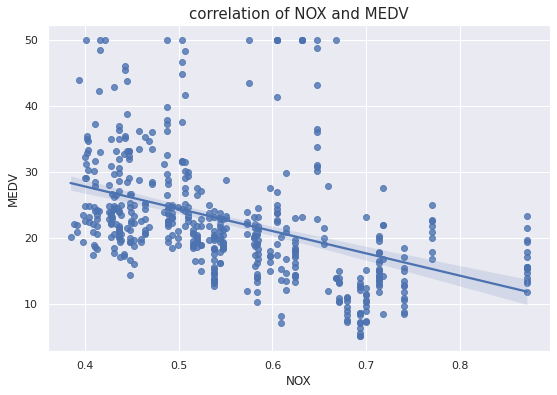

In [50]:
sns.regplot(x=df['NOX'],y=df['MEDV'],fit_reg=True)
plt.title("correlation of NOX and MEDV", fontsize=15)
plt.show()

NOX의 회귀계수가 약 -18.1 즉 음의 상관관계의 값을 추출하였으므로 시각적으로 음의 상관관계를 확인하기 위해 regplot함수를 사용하였습니다.
***

<h2>문제 7-2번 풀이</h2>

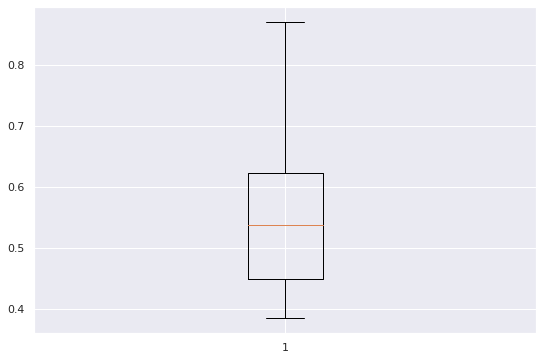

In [51]:
plt.boxplot(df['NOX'])
plt.show()

NOX분포를 boxplot을 통해 시각적으로 확인을 해 보았습니다.

In [52]:
print("NOX 의 최댓값 : %f" %max(df['NOX']))
print("NOX 의 최솟값 : %f" %min(df['NOX']))

NOX 의 최댓값 : 0.871000
NOX 의 최솟값 : 0.385000


NOX는 데이터에서 1씩 변할 수 없습니다 !
***




<h2>문제 7-3번 풀이</h2>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


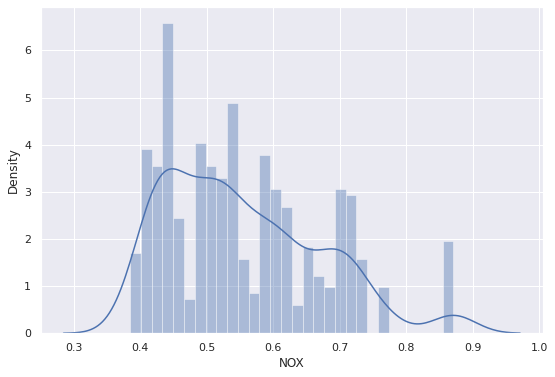

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(9,6)})
sns.distplot(df['NOX'], bins=30)
plt.show() 

NOX의 분포도를 확인해보고 싶어서 distplot함수를 사용하였습니다. 이를 통해 평균으로 부터 데이터가 어느정도 떨어져 있는지 시각적으로 확인이 가능합니다.

In [54]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


NOX의 평균과 표준편차 값을 확인할수 있습니다.

표준편차의 값이 커진다는 뜻은 데이터 값들이 평균과 밀접하지 않고 다양한 값을 지닌다는 의미이고 이로 인해 종속변수 값의 변화는 더욱 커 집니다.

In [55]:
std_NOX = df.describe().reset_index().at[2,'NOX'] #RM의 표준편차
beta_5 = lr.coef_[4]
hint2 = std_NOX * beta_5 #표준편차 * 가중치
hint2

-2.101518920232789

NOX의 회귀계수는 약 -18.1이였습니다. 모든 특성들중 가장 회귀계수의 값이 낮아 음의 상관관계에 가장 큰 영향을 줄 것으로 예측할수 있으나 문제는 표준편차 값이 작습니다. 이로인해 종속변수 MEDV값에 큰 영향을 주지 못합니다. 
***

<h2> 문제 7-4번 풀이 </h2>

In [56]:
m = max(df["NOX"])
n = min(df['NOX'])
print("NOX의 최댓값 : %f" %(m))
print("NOX의 최솟값 : %f" %(n))
print("NOX의 최댓값 - 최솟값 : %f" %(m-n))

NOX의 최댓값 : 0.871000
NOX의 최솟값 : 0.385000
NOX의 최댓값 - 최솟값 : 0.486000


In [57]:
MEDV_change_by_nox_max = lr.coef_[4] * m + 10
MEDV_change_by_nox_min = lr.coef_[4] * n + 10
abs(MEDV_change_by_nox_max - MEDV_change_by_nox_min)

8.813934084795367

assumption1 : every other features are fixed.다음과 같이 조건이 주어졌으므로 상수 10으로 고정시켜 주었습니다.

그 후 nox의 최대변화량에 따른 MEDV의 최대변화량을 구한후 절대값을 해주었습니다. 값의 변화량이기 때문에 양수값을 만들기 위하여 절대값을 해 주었습니다
***

<h2> 6번과 7번을 통해 얻은 최종적인 결론입니다 </h2>

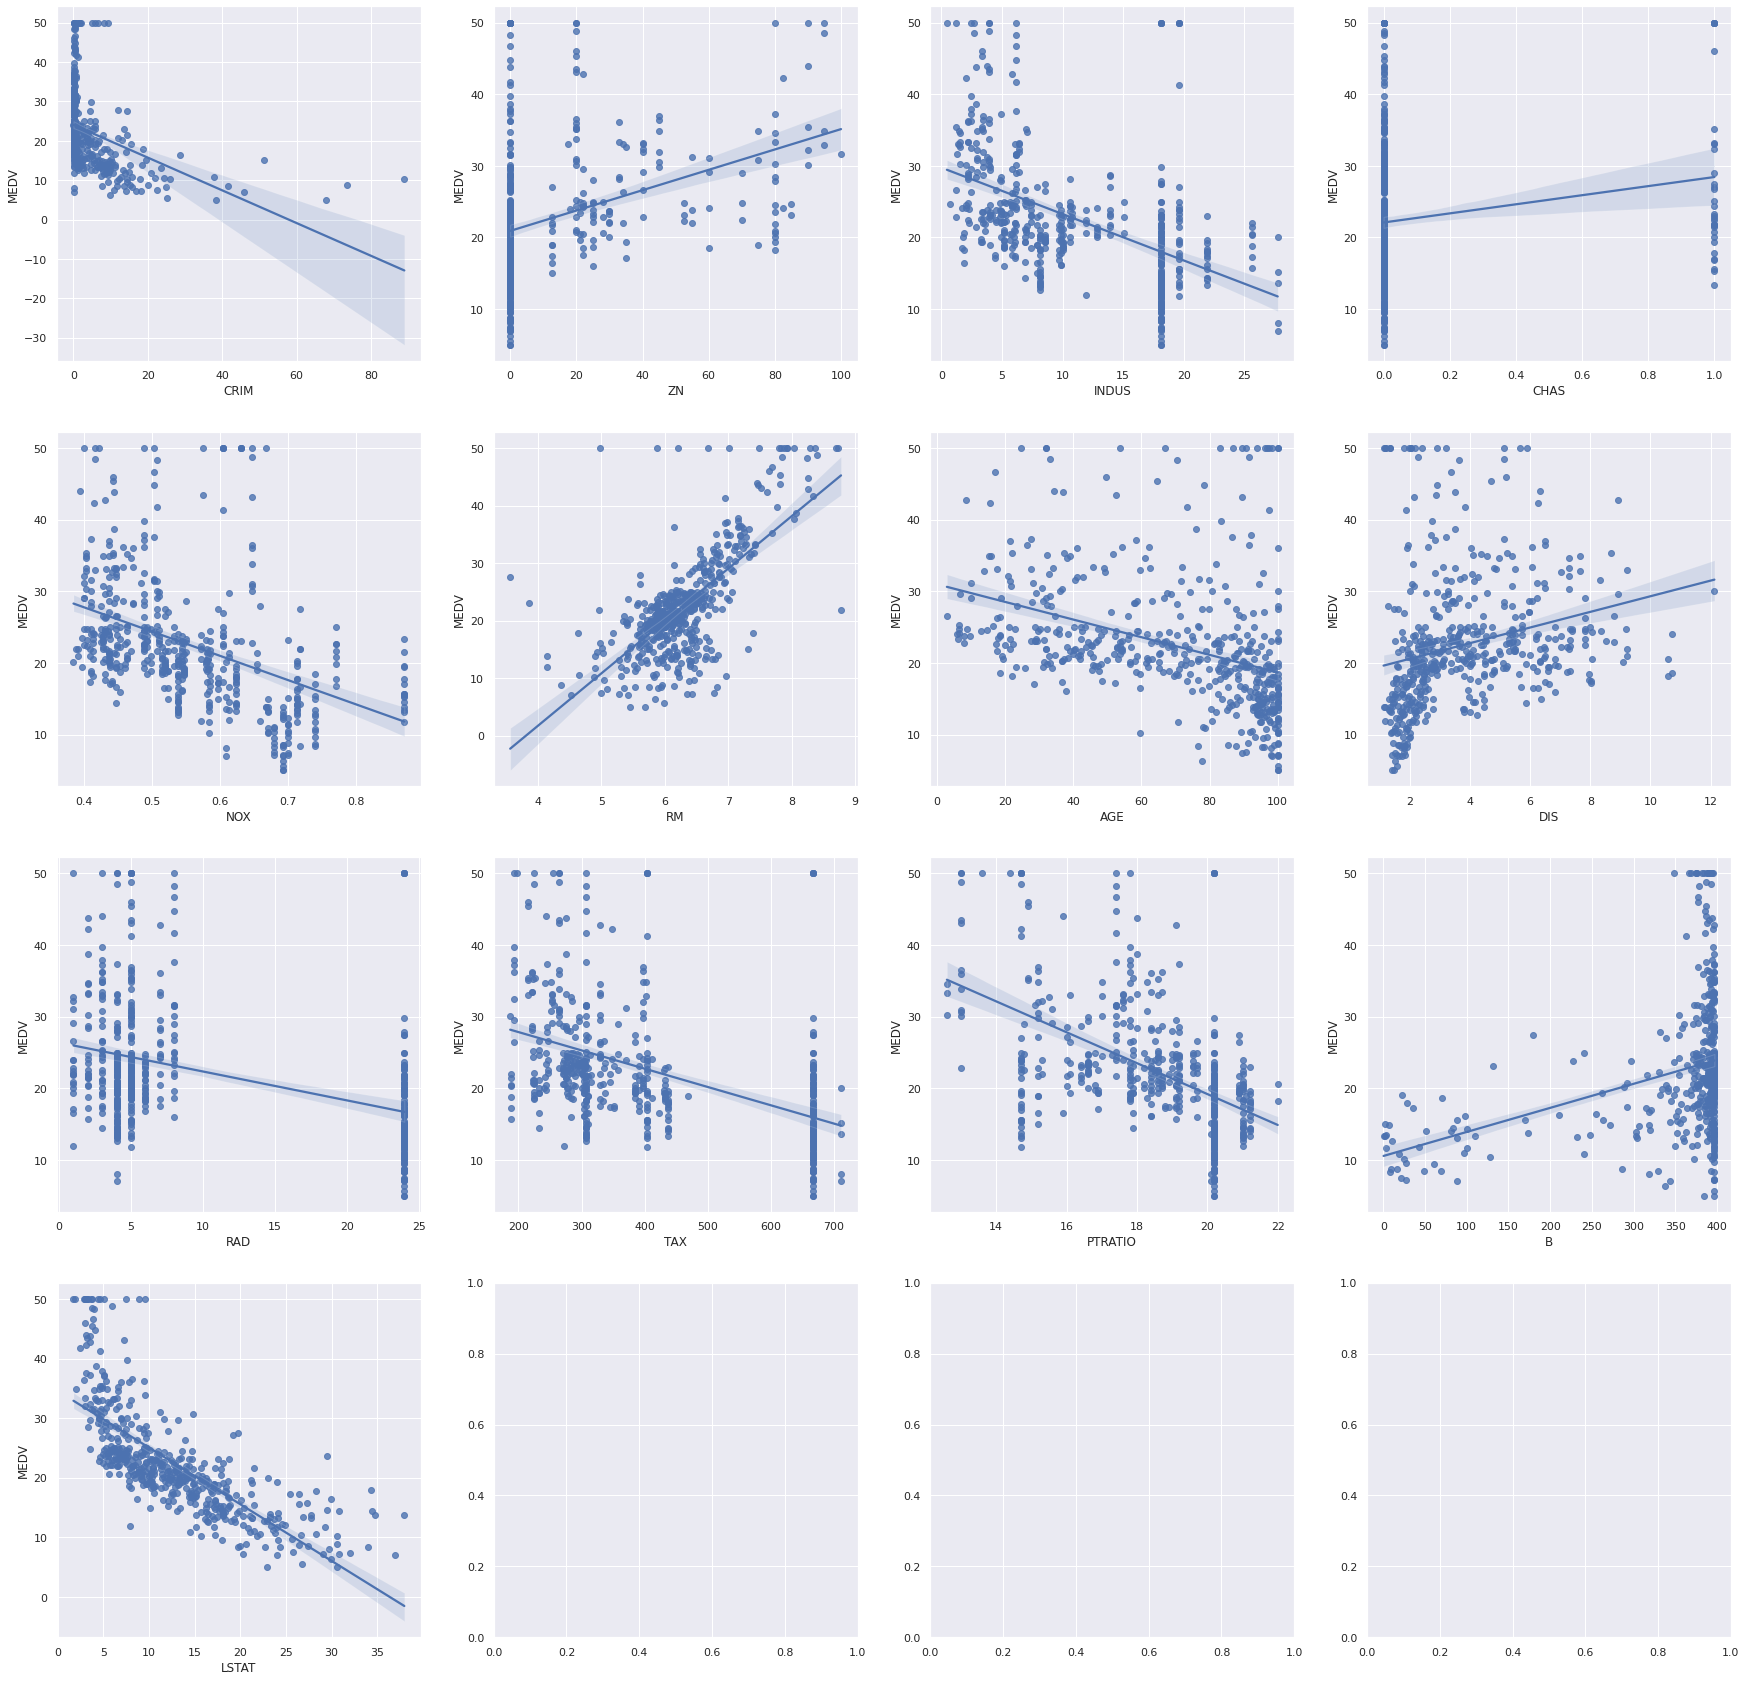

In [58]:
fig,axs=plt.subplots(figsize=(30,30),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for i ,feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature,y='MEDV',data=df,ax=axs[row][col])

#모든 특징을 관찰한 결과 RM, LSTAT가 영향을 크게 미칩니다.
#가구당 평균 방수가 많을 수록(RM) 주택의 가치(MEDV)가 높고 지위가 낮을수록(LSTAT) 주택의 가치(MEDV)가 낮아 집니다.

최종적인 결론은 다음과 같습니다. 종속변수의 값에 가장 큰 영향은 주는 것은 독립변수의 회귀계수 뿐만 아니라 표준편차도 고려되어야 합니다. 

이로 인해 MEDV값에 가장 강력한 양의 상관관계를 가지는 특성으로는 RM 입니다

MEDV값에 가장 강력한 음의 상관관계를 가지는 특성으로는 LSTAT입니다.

In [59]:
std_LSTAT = df.describe().reset_index().at[2,'LSTAT'] #RM의 표준편차
beta_13 = lr.coef_[12]
hint2 = std_LSTAT * beta_13 #표준편차 * 가중치
hint2

-4.128740762724841

LSTAT의 가중치 * 표준편차를 구해보았습니다.
***

# Q8. Anlayze the intercept
**assumption1 : use training set to anlayze.**
1. What is the expected mean value of 'MEDV' in $ when all features(x) have no effect
    * you can regard intercept as default value of 'MEDV' ( roughly )
    * be careful : in $, not in $1,000
2. Can all features(x) be zero in the data?
    * Can all features(x) have no effect?

<h2>문제 8-1 풀이</h2>

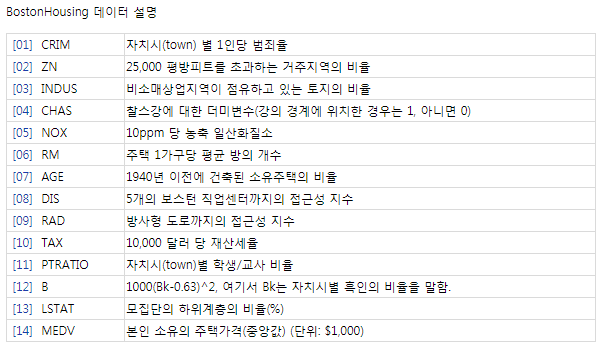

In [60]:
####################
## Your code here ##
####################
print('intercept : ',lr.intercept_*1000)

intercept :  35074.44644384203


모든 특성이 의미가 없는 경우 절편값이 MEDV값의 금액이 됩니다.

약 $35074입니다.
***

<h2>문제 8-2 풀이</h2>

모든 특성을 0으로 만들 수 없습니다. 모든 범죄율이 0이 되는 점, 일산화질소가 0이 되는점, 10000달러 당 재산세율이 0이라는 점, 등 이러한 가정은 아무 의미가 없고 이로 인해 나온 절편값도 해석을 할 수 없는 값입니다. 따라서 데이터의 모든 회귀계수가 0이 되는 데이터는 문제가 있는 데이터이며 사용하는 것이 바람직하지 않다고 생각합니다. 모든 특징이 영향이 없다는 가정도 말이 되지 않습니다. 실제로 회귀계수값이 유의미한 값으로 도출된 특성들이 있습니다.
***

In [67]:
print(x_train.min())

CRIM         0.00906
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.92000
dtype: float64
